# Matplotlib Usage Tutorial

The purpose of this tutorial is to run through the basic usage of Matplotlib in python. This tutorial is taken from the Matplotlib website and can be found [here](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py) for those who are interested in reading the full tutorial.

#### General Concepts
Matplotlib offers an extensive codebase for visualising data in Python. Most of the library can be understodd with a fairly simple conceptual framework and knowledge of a few important points. 

Plotting requires action on a range of levels, from the most general to the most specific. The purpose of a plotting package is to assist visualisation of data as easily as possible, with all the necessary controls. 

For this tutorial we will import two packages below:

In [7]:
# Import packages for use within this tutorial
import matplotlib.pyplot as plt
import numpy as np
import pandas

import os 
import os.path

# set WD to current file location
wd = os.getcwd()
os.chdir(wd)

Before we proceed further, it is important to understand the ***Parts of a Figure***

![image](./Images/Matplotlib_Anatomyofafigure.jpg)

The figure keeps track of all the child *axes*, a smattering of 'special' artists (titles, figure legends etc) and the *canvas*. A figure can have any number of *axes*, but to be useful should have at least one. 

The easiest way to create a new figure is with pyplot:

<Figure size 432x288 with 0 Axes>

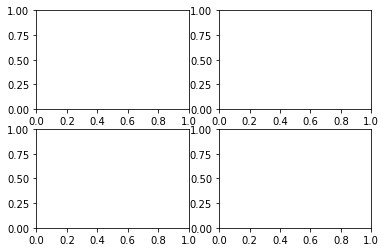

In [5]:
fig = plt.figure() # an empty figure with no axes
fig.suptitle('No axes on this figure') # Add a title so we know which it is. 

fig, ax_lst = plt.subplots(2,2) # a figure with a 2x2 grid of Axes

*Axes*


This is what you think of as 'a plot', it is the region of the image with the data space. A given figure can contain many Axes, but a given *Axes* object can only be in one *Figure*. The Axes contains two (or three in the case of 3D) *Axis* objects (be aware of the difference between ***Axes*** and ***Axis***) which take care of the data limits (the data limits can also be controlled via set via the *set_xlim()* and *set_ylim()* *Axes* methods). Each *Axes* has a title (set via *set_title()*), an x-label (set via *set_xlabel()*), and a y-label set via *set_ylabel()*).

The *Axes* class and its member functions are the primary entry point to working with the OO interface.

*Axis*


These are the number-line-like objects. They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a *Locator* object and the ticklabel strings are formatted by a *Formatter*. The combination of the correct *Locator* and *Formatter* gives very fine control over the tick locations and labels.

*Artist*


Basically everything you can see on the figure is an artist (even the *Figure, Axes*, and *Axis* objects). This includes *Text* objects, *Line2D* objects, *collection* objects, *Patch* objects ... (you get the idea). When the *figure* is rendered, all of the artists are drawn to the ***canvas***. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

## Types of inputs to plotting functions


All of plotting functions expect *np.array* or *np.ma.masked_array* as input. Classes that are 'array-like' such as *pandas* data objects and *np.matrix* may or may not work as intended. It is best to convert these to *np.array* objects prior to plotting.

For example, to convert a *pandas.DataFrame* or *np.matrix* do the following:

In [9]:
# Create a Pandas dataframe and convert to array
a = pandas.DataFrame(np.random.rand(4,5), columns = list('abcde'))
a_asarray = a.values

# Create a Numpy matrix and convert to array
b = np.matrix([[1,2], [3,4]])
b_asarray = np.asarray(b)

## Matplotlib, pyplot and pylab: how are they related? 


*Matplotlib* is the whole package and *matplotlib.pyplot* is a module in Matplotlib. 
For functions in the pyplot module, there is always a "current" figure and axes (which is created automatically on request). For example, the first call below to *plt.plot* creates the axes, then subsequent calls to *plt.plot* add additional lines on the same axes, and *plt.xlabel, plt.ylabel* and *plt.legend* set the axes labels, title and add a legend. 

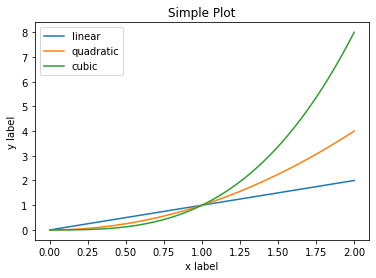

In [10]:
# Create a simple plot using pyplot
x = np.linspace(0, 2, 100)

plt.plot(x, x, label = 'linear')
plt.plot(x, x**2, label = 'quadratic')
plt.plot(x, x**3, label = 'cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

*pylab* is a convenience module that bulk imports *matplotlib.pyplot* for plotting and *numpy* for mathematics and working with arrays in to a single namespace. *pylab* is deprecated and its use is strongly discrouraged because of namespace pollution, use *pyplot* instead. 

For non-interactive plotting, it is suggested to use *pyplot* to create the figures and then the OO interface for plotting. 



## Coding Styles
When viewing this documentation and examples, you will find different coding styles and usage patterns. These styles are perfectly valid and have their pros and cons. Just about all of the examples can be converted into another style and achieve the same results. The only caveat is to avoid mixing the coding styles for your own code.

Of the different styles, there are two that are officially supported. Therefore, these are the preferred ways to use matplotlib.

For the pyplot style, the imports at the top of your scripts will typically be:

In [11]:
import matplotlib.pyplot as plt
import numpy as np

Then one calls, for example, np.arrange, np.zeroes, np.pi, plt.figure, plt.plot, plt.show etc. Use the pyplot interface for creating figures, and then use the object methods for the rest:

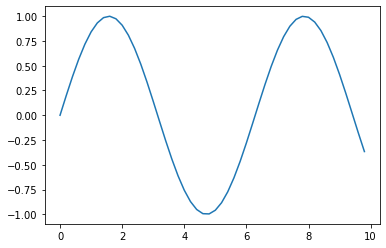

In [13]:
x = np.arange(0, 10, 0.2)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

So, why all the extra typing instead of the MATLAB-style (which relies on global state and a flat namespace)? For very simple things like this example, the only advantage is academic: the wordier styles are more explicit, more clear as to where things come from and what is going on. For more complicated applications, this explicitness and clarity becomes increasingly valuable, and the richer and more complete object-oriented interface will likely make the program easier to write and maintain.

Typically one finds oneself making the same plots over and over again, but with different data sets, which leads to needing to write specialized functions to do the plotting. The recommended function signature is something like:

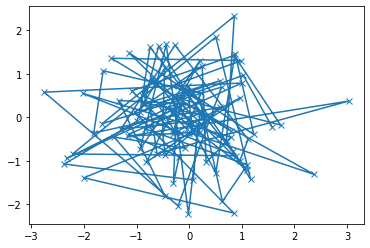

In [14]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

# which you would then use as:

data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})


or if you wanted to have 2 sub-plots:

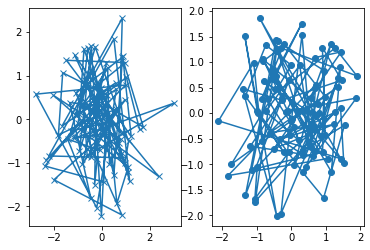

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

This ends the tutorial of basic Matplotlib usage. The next tutorial for Matplotlib will focus on Pyplot. 